# Objective

This notebook shows the spot images and parameters generated for Figure 2a and ready for worker annotations.

I think we might be seeing messy results because there are many and a lot of spots, and the effect of many bright spots close together on the worker's perception might be confounding SNR effects. I think we should try the 2a test again with fewer spots and less variation in SNR. As you’ve pointed out, we don’t want this to be a test of worker persistence or spot crowdedness.

 -  num_spots = 50
     - Note: density = 0.008 corresponded with NND ~6 (= reasonable for turkers to annotate on a 300 x 300 image) but the effect of many bright spots close together on the worker's perception might be confounding SNR effects. We want this to be a test of SNR, not worker persistence or spot crowdedness.

 -	background image: MAX_ISP_300_2.tif (tissue)
 -	average SNR = [1, 3]
     -		5 typically showed poorer performance
     -		10 typically showed notably better performance than SNR = 5
 -  SNR st dev = 1
 -  spot_sigma = 1.75

In [1]:
import sys
sys.path.insert(0, '../../../../FISH-annotation/SpotImage')
from SpotImage import SpotImage
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KDTree
from matplotlib.lines import Line2D
import math

"""
Instantiate the SpotImage.
"""

bg_img_path = 'MAX_ISP_300_2.tif'
global_intensity_dial = 2.5   # raise the threshold found by Otsu's

### These parameters are the same for all images in this batch.

In [2]:
plot_spots = True
plot_img = True
save_spots = True
save_img = True

num_spots = 50
snr_sigma = 1
snr_threshold = 3

### These parameters vary.

In [3]:
snr_mu_list = [1, 3]

### Generate spot images.

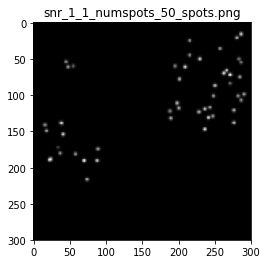

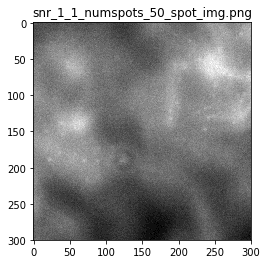

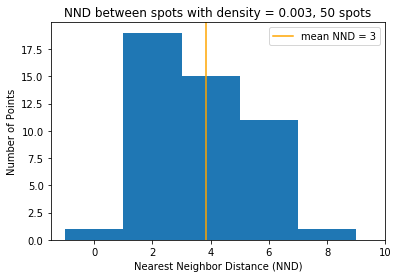

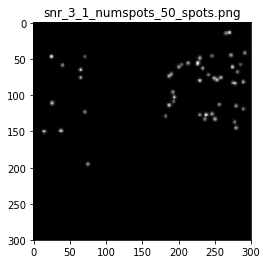

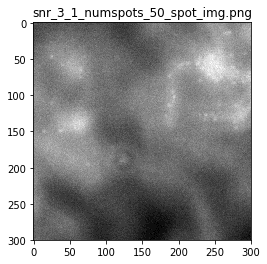

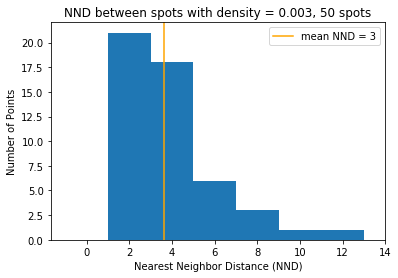

In [4]:
for snr_mu in snr_mu_list:
    si = SpotImage(bg_img_path=bg_img_path, global_intensity_dial=global_intensity_dial)
    snr_distr_params = ['Gauss', snr_mu, snr_sigma]
    name = 'snr_' + str(snr_mu) + '_' + str(snr_sigma) + '_numspots_' + str(num_spots)
    spots_filename = name + '_spots.png'
    spot_img_filename = name + '_spot_img.png'
    csv_filename = name + '_coord_snr_list.csv'
    si.generate_spot_image(num_spots = num_spots, snr_distr_params = snr_distr_params, snr_threshold = snr_threshold, plot_spots=plot_spots, plot_img=True, save_spots=True, save_img=True, spots_filename=spots_filename, spot_img_filename=spot_img_filename)
    si.plot_spot_nnd()
    si.get_coord_snr_list_csv(csv_filename)